In [1]:
%load_ext lab_black
%load_ext autotime
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import drnb as nb

time: 268 ms (started: 2022-09-17 11:54:26 -07:00)


Parameters:

* `perplexity=30`
* `learning_rate="auto"`: `"auto"` means use the method of Belkina and co-workers which scaled the learning rate with the size of the dataset.
* `early_exaggeration_iter=250`
* `early_exaggeration=12`
* `n_iter=500`
* `exaggeration=None`: amount of exaggeration to apply during the non-early part of the iteration. Can give a more UMAP-like appearance.
* `dof=1`: degrees of freedom in the heavy-tail parameterization: `100` for SNE-like behavior. `0.5` gives noticeably compressed clusters.
* `theta=0.5`: amount of approximation when using Barnes-Hut (`negative_gradient_method="bh"`). `0` is exact t-SNE. Typical values 0.2-0.8. Can be set to `"auto"`.
* `n_interpolation_points=3`: an FFT setting. Don't touch it.
* `min_num_intervals=50`: another FFT setting. The higher the value, the more accurate the gradient calculation.
* `ints_in_interval=1`: grid size length in FFT. Lower is more accurate.
* `initialization="pca"`: one of `"pca"`, `"spectral"` or `"random"`. Or a matrix.
* `metric="euclidean"`: metric to use with one of the nearest neighbor methods.
* `metric_params=None`
* `initial_momentum=0.5`
* `final_momentum=0.8`
* `max_grad_norm=None`: clips the gradient norm.
* `max_step_norm=5`: clips the update step size.
* `n_jobs=1`: `-1` means use all processors.
* `neighbors="auto"`: one of: `"exact"`, `"annoy"`, `"pynndescent"`", `"hnsw"`, `"approx"` (`"annoy"` if possible, `"pynndescent"` otherwise) or `"auto"` (`"exact"` if `N < 1000` and `"approx"` otherwise).
* `negative_gradient_method="auto"`: one of: `"bh"` (Barnes-Hut), `"fft"` (FFT interpolation) or `"auto"` (BH if `N < 10000`, FFT otherwise).
* `callbacks=None`: one or a list of functors that implement `def callback(iteration, error, embedding):`
* `callbacks_every_iters=50`: number of iterations between the `callbacks` being called.
* `random_state=None`
* `verbose=False`

In [2]:
import drnb.embed.pipeline as pl

embed_pipeline = pl.create_pipeline(
    method=pl.embedder("tsne", use_precomputed_knn=True),
    eval_metrics=[
        ("rte", dict(use_precomputed_triplets=True, random_state=42)),
        ("rpc", dict(use_precomputed_triplets=True, random_state=42)),
        ("nnp", dict(n_neighbors=[15, 50, 150])),
    ],
    verbose=True,
    plot=dict(cex=5, alpha_scale=0.5, figsize=(6, 4), legend="force"),
)

time: 4.18 s (started: 2022-09-17 11:54:26 -07:00)


[11:54:30] INFO     Getting dataset s1k                                                              ]8;id=654509;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=540386;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#37\37]8;;\

           INFO     Embedding                                                                        ]8;id=729763;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=918656;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#40\40]8;;\

           INFO     Using precomputed knn                                                                ]8;id=258199;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=131426;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#41\41]8;;\

           INFO     Using n_neighbors (no self) = 90 based on perplexity 30.00                           ]8;id=264283;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=209220;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#46\46]8;;\

           INFO     Found pre-calculated neighbors file: nn/s1k.150.euclidean.exact.faiss.idx.npy   ]8;id=176532;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=323159;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#235\235]8;;\

[11:54:31] INFO     Calculating affinity for perplexity 30.00                                            ]8;id=733850;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=706878;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#59\59]8;;\

           INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=336191;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=376919;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

           INFO     Running t-SNE                                                                        ]8;id=327314;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=949110;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#73\73]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=698595;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=149890;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=411685;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=390264;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

           INFO     Automatically determined negative gradient method `bh`                               ]8;id=188468;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=641381;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

           INFO     Automatically determined negative gradient method `bh`                               ]8;id=956386;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=724427;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[11:54:33] INFO     Embedding completed                                                                  ]8;id=534668;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=126149;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#76\76]8;;\

           INFO     Evaluating                                                                       ]8;id=438906;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=642122;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#43\43]8;;\

           INFO     Random Triplet Evaluation num triplets per point: 5                              ]8;id=342360;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=404196;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=772365;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=528445;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.csv                                 ]8;id=273014;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=637319;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=36527;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=897774;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

           INFO     Random Pair Correlation num triplets per point: 5                                ]8;id=897431;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=570905;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=642776;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=285811;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.csv                                 ]8;id=823040;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=599335;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=537853;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=831239;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

           INFO     Neighbor Preservation for n_neighbors: [15, 50, 150] (excluding self)            ]8;id=43031;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=311176;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Loading faiss with AVX2 support.                                                   ]8;id=114840;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=245832;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#54\54]8;;\

           INFO     Could not load library with AVX2 support due to:                                   ]8;id=671018;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=532047;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#58\58]8;;\
                    ModuleNotFoundError("No module named 'faiss.swigfaiss_avx2'")                                  

           INFO     Loading faiss.                                                                     ]8;id=768556;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=472022;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#64\64]8;;\

           INFO     Successfully loaded faiss.                                                         ]8;id=555822;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py\loader.py]8;;\:]8;id=332274;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/faiss/loader.py#66\66]8;;\

[11:54:34] INFO     Plotting                                                                         ]8;id=551442;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=351390;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#46\46]8;;\

           INFO     Looking for pkl format from data/s1k-target-palette.pkl                         ]8;id=152439;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=487671;file:///home/james/dev/drnb/src/drnb/io/__init__.py#152\152]8;;\

           INFO     Exporting                                                                        ]8;id=541132;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=862130;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#49\49]8;;\

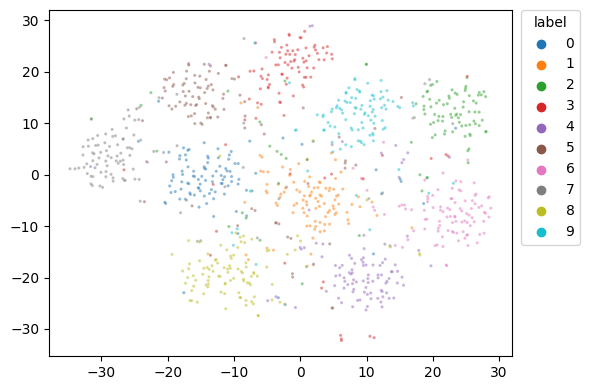

time: 4.16 s (started: 2022-09-17 11:54:30 -07:00)


In [3]:
_ = embed_pipeline.run("s1k")

[11:54:35] INFO     Getting dataset cifar10act                                                       ]8;id=796781;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=786106;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#37\37]8;;\

           INFO     Embedding                                                                        ]8;id=464874;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=134542;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#40\40]8;;\

           INFO     Using precomputed knn                                                                ]8;id=219101;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=663384;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#41\41]8;;\

           INFO     Using n_neighbors (no self) = 90 based on perplexity 30.00                           ]8;id=836447;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=137128;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#46\46]8;;\

           INFO     Found pre-calculated neighbors file:                                            ]8;id=596240;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=61772;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#235\235]8;;\
                    nn/cifar10act.151.euclidean.exact.faiss.idx.csv                                                

           INFO     Calculating affinity for perplexity 30.00                                            ]8;id=869312;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=686836;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#59\59]8;;\

           INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=679545;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=703211;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[11:54:37] INFO     Running t-SNE                                                                        ]8;id=203773;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=103333;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#73\73]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=134264;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=96363;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

           INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=62106;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=771816;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

[11:54:40] INFO     Automatically determined negative gradient method `fft`                              ]8;id=591232;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=366646;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[11:55:02] INFO     Automatically determined negative gradient method `fft`                              ]8;id=863414;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=820133;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[11:56:07] INFO     Embedding completed                                                                  ]8;id=679043;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=327674;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#76\76]8;;\

           INFO     Evaluating                                                                       ]8;id=877932;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=17629;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#43\43]8;;\

           INFO     Random Triplet Evaluation num triplets per point: 5                              ]8;id=479604;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=615258;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=787872;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=988948;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/cifar10act.5.1337.idx.csv                          ]8;id=498960;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=825658;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=329454;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=775610;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

[11:56:11] INFO     Random Pair Correlation num triplets per point: 5                                ]8;id=940486;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=235083;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=45650;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=320906;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/cifar10act.5.1337.idx.csv                          ]8;id=746736;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=380461;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=991728;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=195330;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

[11:56:15] INFO     Neighbor Preservation for n_neighbors: [15, 50, 150] (excluding self)            ]8;id=917538;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=918748;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

[11:56:22] INFO     Plotting                                                                         ]8;id=630790;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=431530;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#46\46]8;;\

           INFO     Looking for pkl format from data/cifar10act-target-palette.pkl                  ]8;id=389120;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=565547;file:///home/james/dev/drnb/src/drnb/io/__init__.py#152\152]8;;\

[11:56:24] INFO     Exporting                                                                        ]8;id=419404;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=63196;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#49\49]8;;\

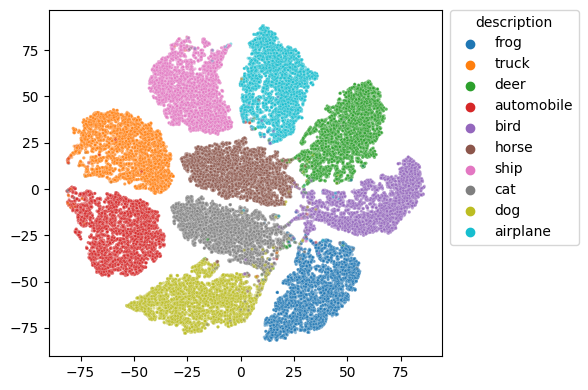

time: 1min 50s (started: 2022-09-17 11:54:35 -07:00)


In [4]:
_ = embed_pipeline.run("cifar10act")

In [5]:
embed_pipeline_spectral = pl.create_pipeline(
    method=pl.embedder("tsne", initialization="spectral"),
    eval_metrics=[
        "rte",
        "rpc",
        ("nnp", dict(n_neighbors=[15, 50, 150])),
    ],
    verbose=True,
    plot=dict(cex=5, alpha_scale=0.5, figsize=(6, 4), legend="force"),
)

time: 17.6 ms (started: 2022-09-17 11:56:25 -07:00)


[11:56:25] INFO     Getting dataset cifar10act                                                       ]8;id=216106;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=820886;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#37\37]8;;\

           INFO     Embedding                                                                        ]8;id=954893;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=133038;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#40\40]8;;\

           INFO     Using precomputed knn                                                                ]8;id=858627;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=802166;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#41\41]8;;\

           INFO     Using n_neighbors (no self) = 90 based on perplexity 30.00                           ]8;id=65987;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=784268;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#46\46]8;;\

           INFO     Found pre-calculated neighbors file:                                            ]8;id=244350;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py\__init__.py]8;;\:]8;id=14612;file:///home/james/dev/drnb/src/drnb/neighbors/__init__.py#235\235]8;;\
                    nn/cifar10act.151.euclidean.exact.faiss.idx.csv                                                

           INFO     Calculating affinity for perplexity 30.00                                            ]8;id=808035;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=43378;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#59\59]8;;\

           INFO     KNN index provided. Ignoring KNN-related parameters.                            ]8;id=400157;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py\affinity.py]8;;\:]8;id=807410;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/affinity.py#186\186]8;;\

[11:56:27] INFO     Using initialization spectral                                                        ]8;id=950670;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=129635;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#65\65]8;;\

           INFO     Running t-SNE                                                                        ]8;id=519414;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=335075;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#73\73]8;;\

           INFO     Precomputed affinities provided. Ignoring perplexity-related parameters.           ]8;id=984722;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=539962;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1321\1321]8;;\

[11:56:53] INFO     Automatically determined negative gradient method `fft`                              ]8;id=499002;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=464999;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[11:57:15] INFO     Automatically determined negative gradient method `fft`                              ]8;id=637091;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=220664;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[11:58:43] INFO     Embedding completed                                                                  ]8;id=11946;file:///home/james/dev/drnb/src/drnb/embed/tsne.py\tsne.py]8;;\:]8;id=488541;file:///home/james/dev/drnb/src/drnb/embed/tsne.py#76\76]8;;\

           INFO     Evaluating                                                                       ]8;id=437860;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=202661;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#43\43]8;;\

           INFO     Random Triplet Evaluation num triplets per point: 5                              ]8;id=907784;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=310674;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=921168;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=401047;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/cifar10act.5.1337.idx.csv                          ]8;id=901826;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=291536;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=407209;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=320525;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

[11:58:50] INFO     Random Pair Correlation num triplets per point: 5                                ]8;id=733469;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=11957;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

           INFO     Looking for precomputed triplets                                                ]8;id=409195;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=986339;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#149\149]8;;\

           INFO     Using triplets from triplets/cifar10act.5.1337.idx.csv                          ]8;id=844827;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=100128;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#160\160]8;;\

           INFO     Also found corresponding l2 distances                                           ]8;id=550524;file:///home/james/dev/drnb/src/drnb/eval/triplets.py\triplets.py]8;;\:]8;id=711882;file:///home/james/dev/drnb/src/drnb/eval/triplets.py#163\163]8;;\

[11:58:59] INFO     Neighbor Preservation for n_neighbors: [15, 50, 150] (excluding self)            ]8;id=380202;file:///home/james/dev/drnb/src/drnb/eval/__init__.py\__init__.py]8;;\:]8;id=645203;file:///home/james/dev/drnb/src/drnb/eval/__init__.py#10\10]8;;\

[11:59:04] INFO     Plotting                                                                         ]8;id=569109;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=518110;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#46\46]8;;\

           INFO     Looking for pkl format from data/cifar10act-target-palette.pkl                  ]8;id=657227;file:///home/james/dev/drnb/src/drnb/io/__init__.py\__init__.py]8;;\:]8;id=46444;file:///home/james/dev/drnb/src/drnb/io/__init__.py#152\152]8;;\

[11:59:05] INFO     Exporting                                                                        ]8;id=225072;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=385583;file:///home/james/dev/drnb/src/drnb/embed/pipeline.py#49\49]8;;\

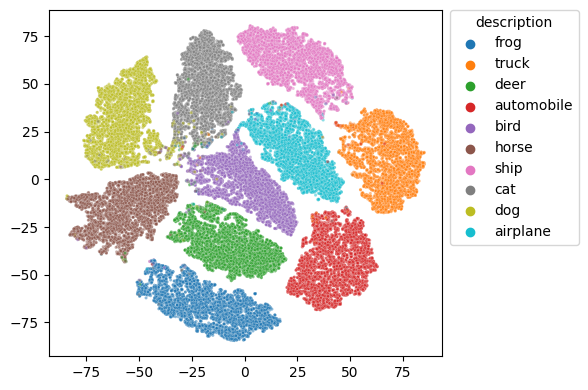

time: 2min 41s (started: 2022-09-17 11:56:25 -07:00)


In [6]:
_ = embed_pipeline_spectral.run("cifar10act")